In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Параметры задачи
Lx = np.pi
Ly = np.pi
T = 1  # конечное время

Nx, Ny, Nt = 50, 50, 100
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dt = T / Nt

# Коэффициенты для схемы
alpha_x = dt / (dx ** 2)
alpha_y = dt / (dy ** 2)

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

u = np.zeros((Nx, Ny))

# u(x, y, 0) = sin(x) * (1 + 2 * y * cos(x))
for i in range(Nx):
    for j in range(Ny):
        u[i, j] = np.sin(x[i]) * (1 + 2 * y[j] * np.cos(x[i]))


In [54]:
# Метод Прогонки
def thomas_method(a, b, c, d):
    n = len(d)
    c_new = np.zeros(n-1)
    d_new = np.zeros(n)
    x = np.zeros(n)

    # Прямой ход прогонки
    c_new[0] = c[0] / b[0]
    d_new[0] = d[0] / b[0]
    
    for i in range(1, n-1):
        denom = b[i] - a[i-1] * c_new[i-1]
        c_new[i] = c[i] / denom
        d_new[i] = (d[i] - a[i-1] * d_new[i-1]) / denom

    # Обратный ход прогонки
    d_new[-1] = (d[-1] - a[-1] * d_new[-2]) / (b[-1] - a[-1] * c_new[-2])
    x[-1] = d_new[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_new[i] - c_new[i] * x[i+1]
    
    return x


In [55]:

# Основной цикл по времени
for n in range(1, Nt):
    # Решаем по x при фиксированном y
    u_temp = np.copy(u)
    for j in range(1, Ny-1):
        a = -alpha_x * np.ones(Nx-1)
        b = (1 + 2 * alpha_x) * np.ones(Nx)
        c = -alpha_x * np.ones(Nx-1)
        d = u_temp[:, j]

        # Граничные условия для x
        d[0] = 0  # u(0, y, t) = 0
        d[-1] = 0  # u(pi, y, t) = 0

        u[:, j] = thomas_method(a, b, c, d)

    # Решаем по y при фиксированном x
    u_temp = np.copy(u)
    for i in range(1, Nx-1):
        a = -alpha_y * np.ones(Ny-1)
        b = (1 + 2 * alpha_y) * np.ones(Ny)
        c = -alpha_y * np.ones(Ny-1)
        d = u_temp[i, :]

        # Граничные условия для y
        d[0] = np.sin(x[i])  # u(x, 0, t) = sin(x)
        d[-1] = np.sin(2 * x[i]) * dy  # du/dy|y=pi = sin(2x)

        u[i, :] = thomas_method(a, b, c, d)


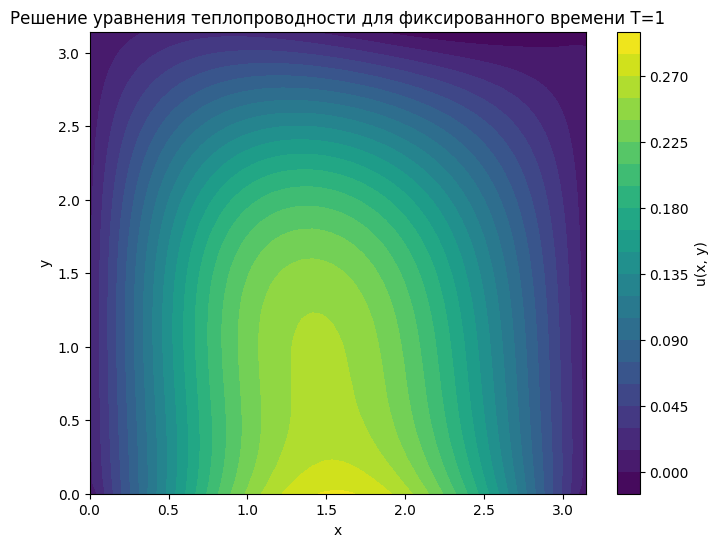

array([[ 0.00000000e+00,  1.06762860e-02,  1.10177255e-02, ...,
         2.84151441e-03,  2.25007791e-03,  0.00000000e+00],
       [ 2.06101149e-02,  2.33554216e-02,  2.51200288e-02, ...,
         6.70093705e-03,  5.17394526e-03,  3.54372233e-03],
       [ 3.85873860e-02,  4.04711167e-02,  4.18236090e-02, ...,
         1.08298920e-02,  8.60065457e-03,  6.33981802e-03],
       ...,
       [ 3.80456405e-02,  3.91649346e-02,  3.97568351e-02, ...,
         8.59908880e-04, -1.21235486e-03, -3.27548414e-03],
       [ 2.02649937e-02,  2.25233129e-02,  2.38033820e-02, ...,
         6.91277809e-04, -5.01846831e-04, -1.60594638e-03],
       [ 1.22464680e-16,  1.03286936e-02,  1.04677239e-02, ...,
         2.47084154e-04, -2.97968289e-04, -6.47003598e-16]])

In [56]:
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u.T, 20)
plt.colorbar(label='u(x, y)')
plt.title(f'Решение уравнения теплопроводности для фиксированного времени {T=}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

u